In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
k = 12
p = 1/2
q=1-p
n = 150

In [ ]:
x = []
p_values = []
for i in range(k+1):
  x.append(i)
  val = math.comb(k, i) * p ** (i) * q ** (k-i)
  p_values.append(val)

In [ ]:
print(x)
print(p_values)
print(len(p_values))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[0.000244140625, 0.0029296875, 0.01611328125, 0.0537109375, 0.120849609375, 0.193359375, 0.2255859375, 0.193359375, 0.120849609375, 0.0537109375, 0.01611328125, 0.0029296875, 0.000244140625]
13


In [ ]:
teor = np.cumsum(p_values)

In [ ]:
print(teor)

[2.44140625e-04 3.17382812e-03 1.92871094e-02 7.29980469e-02
 1.93847656e-01 3.87207031e-01 6.12792969e-01 8.06152344e-01
 9.27001953e-01 9.80712891e-01 9.96826172e-01 9.99755859e-01
 1.00000000e+00]


In [ ]:
points = np.random.rand(n)

In [ ]:
points

array([0.114236  , 0.9480901 , 0.58653324, 0.84143686, 0.5208805 ,
       0.587056  , 0.80613422, 0.36763237, 0.71681524, 0.65091753,
       0.83283337, 0.43989539, 0.53645143, 0.98435436, 0.58033866,
       0.31904557, 0.42421993, 0.68309437, 0.34445069, 0.91341935,
       0.44393672, 0.63073829, 0.56107295, 0.98885692, 0.60145795,
       0.93893006, 0.70639314, 0.53640236, 0.91384895, 0.67766711,
       0.84666336, 0.65536141, 0.30010471, 0.83704803, 0.89975554,
       0.27047923, 0.10027254, 0.47754684, 0.07564818, 0.77671103,
       0.71637782, 0.84739236, 0.01649596, 0.75670977, 0.44007864,
       0.15484736, 0.19819114, 0.74312407, 0.0066622 , 0.39456334,
       0.38976436, 0.37943564, 0.31165197, 0.44259154, 0.96584351,
       0.00771935, 0.08323512, 0.65097536, 0.21795664, 0.74323782,
       0.71906987, 0.62537763, 0.24165933, 0.41029795, 0.52479327,
       0.01442174, 0.96354359, 0.70893952, 0.53091647, 0.71902916,
       0.56535455, 0.47207913, 0.94165936, 0.50381258, 0.25760

In [ ]:
data = np.arange(n)
for i in range(n):
    data[i]=0
for j in range (k+1):
  for i in range(n):
    if(j==0):
      if(points[i]<teor[j]):
        data[i]=j
    elif(teor[j-1]<points[i]<teor[j]):
        data[i]=j
print(data)

[ 4  9  6  8  6  6  7  5  7  7  8  6  6 10  6  5  6  7  5  8  6  7  6 10
  6  9  7  6  8  7  8  7  5  8  8  5  4  6  4  7  7  8  2  7  6  4  5  7
  2  6  6  5  5  6  9  2  4  7  5  7  7  7  5  6  6  2  9  7  6  7  6  6
  9  6  5  5  8  6  4  7  9  4  7  6  6  7  6  3  7  8  5  4  4  6  5  3
  5  3  8  6  6  8  6  9  4  7  6  3  6  4  5  6  6  5  7  5  7  5  5  9
  6  4  4  5  7  5  7  9  4  4  4  3  8  6  4  7  5  6  6  4  6  4  6  4
  9  8  4  7  6  7]


In [ ]:
chas=np.zeros(k+1)
for i in range(n):
  chas[data[i]]=chas[data[i]]+1
print(chas)
sum=0
for i in range(k+1):
  sum=sum+chas[i]
print(sum)

[ 0.  0.  4.  5. 21. 23. 41. 30. 14. 10.  2.  0.  0.]
150.0


In [ ]:
otn_chas=chas/n
emp = np.cumsum(otn_chas)
print(emp)

[0.         0.         0.02666667 0.06       0.2        0.35333333
 0.62666667 0.82666667 0.92       0.98666667 1.         1.
 1.        ]


In [ ]:
X = pd.DataFrame()
X['Значения СВ'] = x
X['Частоты'] = chas
X['Относительные частоты'] = X['Частоты']/n
X['Накопленные частоты'] = emp
X['Разницы теоретической и эмпирической'] = np.abs(teor - X['Накопленные частоты'])

In [ ]:
X

,Значения СВ,Частоты,Относительные частоты,Накопленные частоты,Разницы теоретической и эмпирической
0,0,0.0,0.000000,0.000000,0.000244
1,1,0.0,0.000000,0.000000,0.003174
2,2,4.0,0.026667,0.026667,0.007380
3,3,5.0,0.033333,0.060000,0.012998
4,4,21.0,0.140000,0.200000,0.006152
5,5,23.0,0.153333,0.353333,0.033874
6,6,41.0,0.273333,0.626667,0.013874
7,7,30.0,0.200000,0.826667,0.020514
8,8,14.0,0.093333,0.920000,0.007002
9,9,10.0,0.066667,0.986667,0.005954


In [ ]:
Y = pd.DataFrame()
Y['Эмперическая'] = emp
Y['Теоретическая'] = teor
Y

,Эмперическая,Теоретическая
0,0.000000,0.000244
1,0.000000,0.003174
2,0.026667,0.019287
3,0.060000,0.072998
4,0.200000,0.193848
5,0.353333,0.387207
6,0.626667,0.612793
7,0.826667,0.806152
8,0.920000,0.927002
9,0.986667,0.980713


In [ ]:
max(abs(teor-emp))

0.03387369791666667

In [ ]:
def teorF(x):
  if x<0:
    return 0
  elif x>k:
    return 1
  elif x>=0 and x<=k:
    return teor[int(x)]
def F(x):
  if x<0:
    return 0
  elif x>k:
    return 1
  elif x>=0 and x<=k:
    return emp[int(x)]

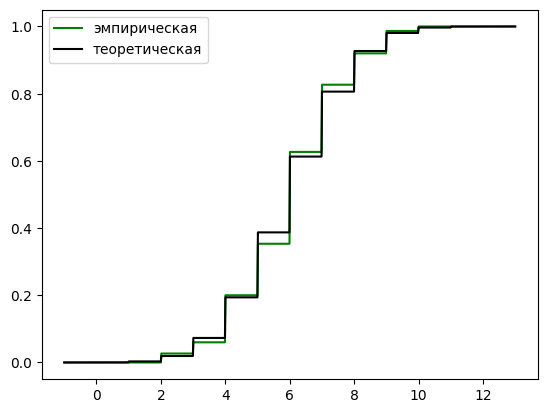

In [ ]:
x_new = np.linspace(-1, k+1, 1000)
y_teor = list(map(teorF, x_new))
y_emper = list(map(F, x_new))
plt.plot(x_new, y_emper, 'green')
plt.plot(x_new, y_teor, 'black')
plt.legend(['эмпирическая', 'теоретическая'])
plt.show()

In [ ]:
np.mean(data)

6.0

In [ ]:
k*p

6.0

In [ ]:
(1/(n-1)) * (np.sum((data - np.mean(data))**2))

2.8456375838926173

In [ ]:
k*p*(1-p)

3.0